In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [399]:
data = pd.read_csv('first inten project.csv')

In [87]:
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

<h2>1. Data Cleaning</h2>

<b>Show Data Info

In [389]:
data.duplicated().sum()

10340

In [391]:
data.drop_duplicates()

number of adults  number of children  number of weekend nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36273                 2                   0                         0   
36276                 2                   0                         2   
36279                 2                   0                         1   
36281                 2                   0                         1   
36283                 3                   0                         0   

       number of week nights  type of meal  car parking space  room type  \
0                          5             1                  0          1   
1                          3             0                  0          1   
2                          3             1                  0          1   
3                          2             1                  0          1   
4                          2             0                  0          1   
...                      ...           ...                ...        ...   
36273                      3             0                  0          1   
36276                      3             0                  0          1   
36279                      1             0                  0          1   
36281                      3             1                  0          1   
36283                      4             1                  0          1   

       lead time  market segment type  repeated  P-C  P-not-C  average price   \
0            224                    0         0    0        0           88.00   
1              5                    1         0    0        0          106.68   
2              1                    1         0    0        0           50.00   
3            211                    1         0    0        0          100.00   
4             48                    1         0    0        0           77.00   
...          ...                  ...       ...  ...      ...             ...   
36273         63                    1         0    0        0           94.50   
36276          5                    1         0    0        0          106.68   
36279         48                    1         0    0        0           94.50   
36281         34                    1         0    0        0          107.55   
36283        121                    0         0    0        0           96.90   

       special requests  booking status  Month  Day  
0                     0               0   10.0  4.0  
1                     1               0   11.0  1.0  
2                     0               1    2.0  2.0  
3                     1               1    5.0  5.0  
4                     0               1    4.0  2.0  
...                 ...             ...    ...  ...  
36273                 0               1    4.0  5.0  
36276                 1               0   11.0  1.0  
36279                 0               1    4.0  2.0  
36281                 1               0   10.0  6.0  
36283                 1               0    7.0  4.0  

[25945 rows x 17 columns]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [17]:
data.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price   special requests  
count  36285.000000  36285.000000    36285.000000      36285.000000  
mean       0.023343      0.153369      103.421636          0.619733  
std        0.368281      1.753931       35.086469          0.786262  
min        0.000000      0.000000        0.000000          0.000000  
25%        0.000000      0.000000       80.300000          0.000000  
50%        0.000000      0.000000       99.450000          0.000000  
75%        0.000000      0.000000      120.000000          1.000000  
max       13.000000     58.000000      540.000000          5.000000

<b>Understand Data

- booking id : ok
- number of adults : ok
- number of children : ok
- number of weekend nights : ok
- number of week nights : ok
- type of meal : ok classes
- car parking space : okay from cell 18 it looks like this should represent the number of slots reserved in parking and mostly represent how many cars do they arrive with
- room type : ok classes
- lead time : The number of days between the reservation date and the actual check-in date
- market segment type : 
- repreated : did he come to the hotel before?
- P-C : how many times he reserved and diclined
- P-not-C : how many times he reserved and not diclined
- average price : ok
- special requests :
- date of reservation : ok
- booking status : ok

In [20]:
data[data['car parking space'] != 0]

Booking_ID  number of adults  number of children  \
35      INN00036                 2                   0   
60      INN00061                 2                   2   
72      INN00073                 2                   0   
84      INN00085                 2                   0   
91      INN00092                 2                   0   
...          ...               ...                 ...   
36100   INN36101                 2                   0   
36134   INN36135                 2                   0   
36177   INN36178                 2                   0   
36210   INN36211                 3                   0   
36260   INN36261                 3                   0   

       number of weekend nights  number of week nights  type of meal  \
35                            0                      1  Not Selected   
60                            0                      1   Meal Plan 1   
72                            1                      1   Meal Plan 1   
84                            1                      2   Meal Plan 1   
91                            1                      2   Meal Plan 1   
...                         ...                    ...           ...   
36100                         0                      2   Meal Plan 1   
36134                         1                      1   Meal Plan 1   
36177                         2                      3   Meal Plan 1   
36210                         1                      2   Meal Plan 1   
36260                         1                      4   Meal Plan 1   

       car parking space    room type  lead time market segment type  \
35                     1  Room_Type 1         23              Online   
60                     1  Room_Type 6          2              Online   
72                     1  Room_Type 1         30              Online   
84                     1  Room_Type 4         46              Online   
91                     1  Room_Type 1         68              Online   
...                  ...          ...        ...                 ...   
36100                  1  Room_Type 1        217              Online   
36134                  1  Room_Type 2         42              Online   
36177                  1  Room_Type 1         55              Online   
36210                  1  Room_Type 4         87              Online   
36260                  1  Room_Type 4        178              Online   

       repeated  P-C  P-not-C  average price   special requests  \
35            0    0        0          115.00                 1   
60            0    0        0          258.00                 1   
72            0    0        0          122.85                 1   
84            0    0        0           98.30                 1   
91            0    0        0          105.30                 0   
...         ...  ...      ...             ...               ...   
36100         0    0        0          124.20                 1   
36134         0    0        0          100.50                 0   
36177         0    0        0           68.07                 1   
36210         0    0        0          159.30                 1   
36260         0    0        0          137.25                 1   

      date of reservation booking status  
35              4/27/2018   Not_Canceled  
60               9/2/2018   Not_Canceled  
72              8/29/2018   Not_Canceled  
84               3/4/2018   Not_Canceled  
91              3/18/2018   Not_Canceled  
...                   ...            ...  
36100           5/24/2018       Canceled  
36134          12/28/2017   Not_Canceled  
36177          11/24/2018   Not_Canceled  
36210            8/8/2018   Not_Canceled  
36260            8/1/2018       Canceled  

[1124 rows x 17 columns]

<b>Show Columns and Rows info

In [22]:
data.shape

(36285, 17)

In [24]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

<b>Show Values for Categorical Columns

In [202]:
for col in data.select_dtypes('object').columns:
    print (col)
    print (data[col].value_counts())
    print ('\n')

Booking_ID
Booking_ID
INN00001    1
INN24194    1
INN24188    1
INN24189    1
INN24190    1
           ..
INN12090    1
INN12089    1
INN12088    1
INN12087    1
INN36286    1
Name: count, Length: 36285, dtype: int64


type of meal
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64


room type
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


market segment type
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


date of reservation
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
             ... 
10/2/2015       1
7/24/2017       1
9/13/2016       1
5/20/2017       1
7/21/2017       1
Name: count, Length: 55

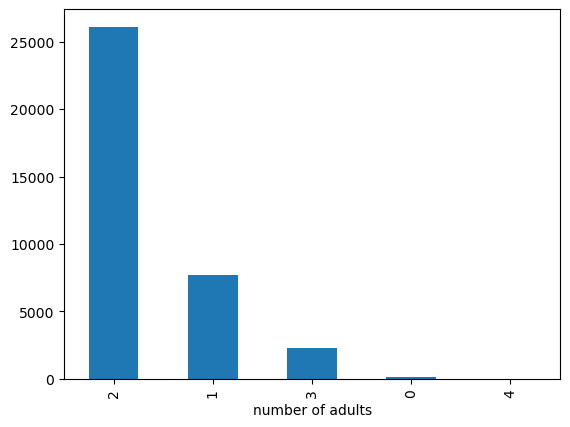

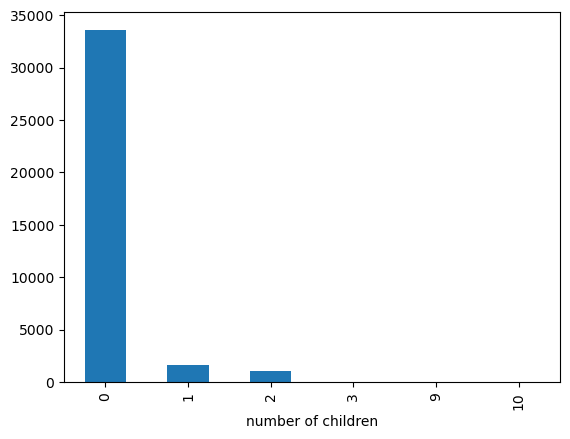

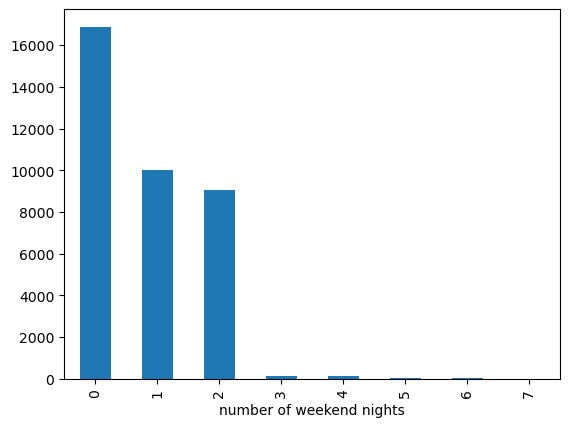

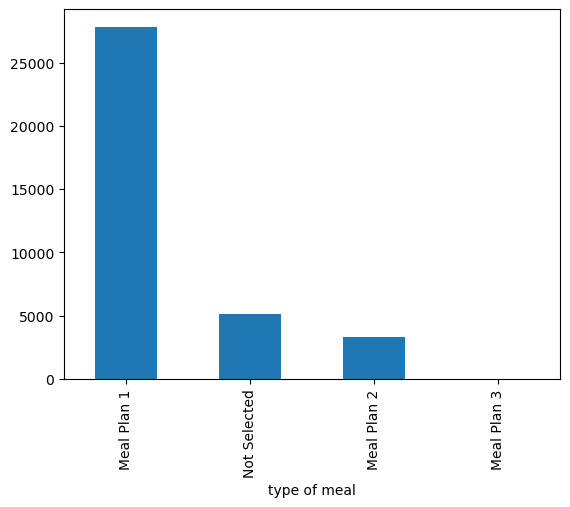

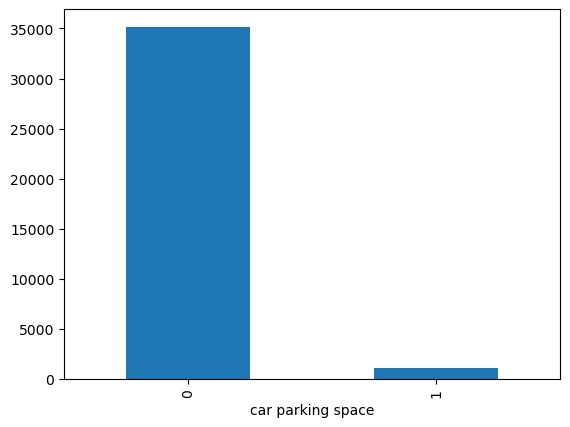

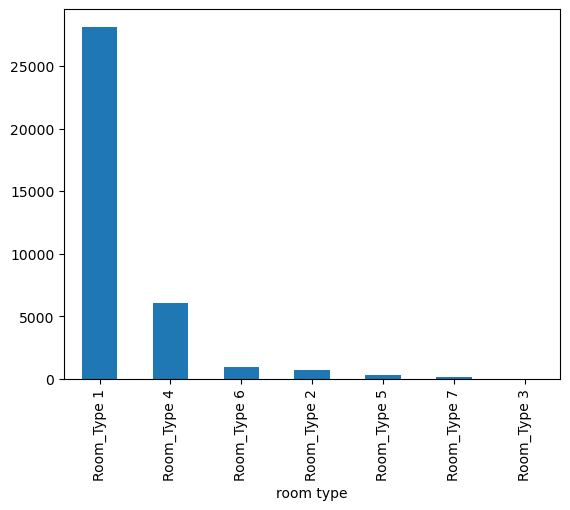

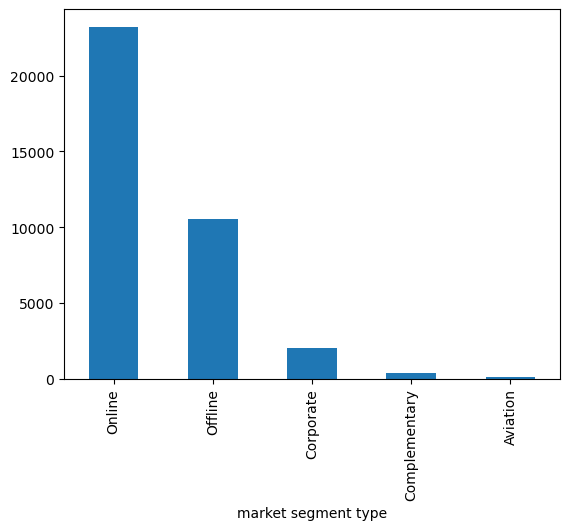

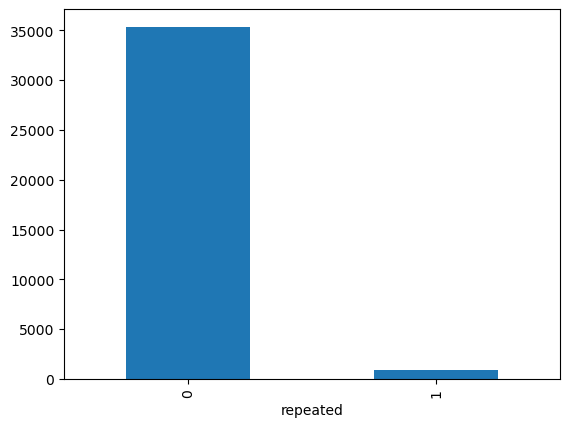

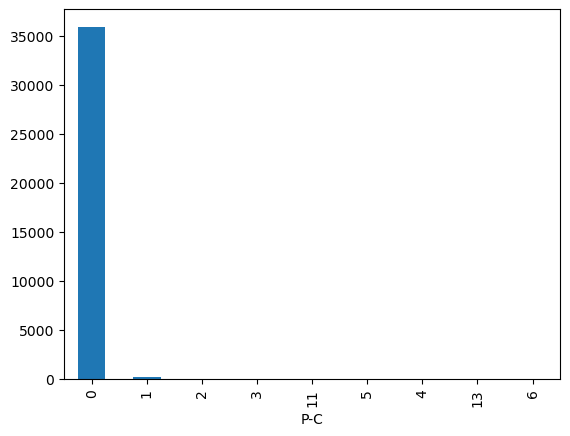

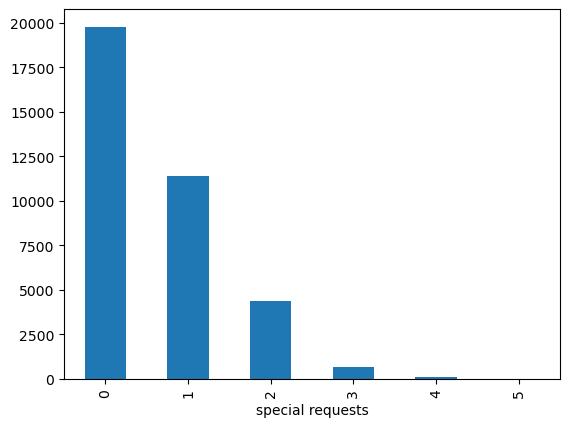

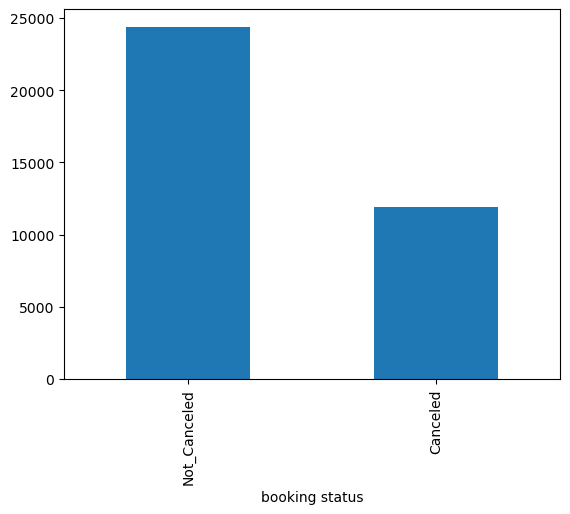

In [28]:
for col in data.columns:
    if  data[col].nunique() < 10 :
        data[col].value_counts().plot.bar()
        plt.show()

<b>Detect Missing Values

In [30]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

<b> NO NULLS

<b> Detect Outliers

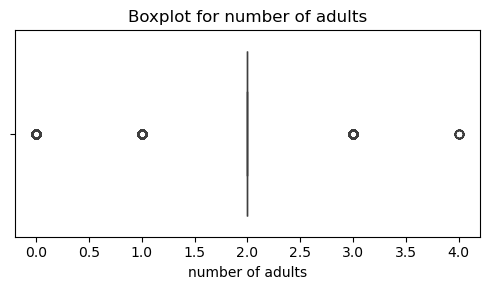

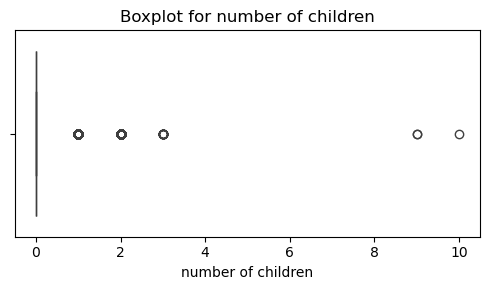

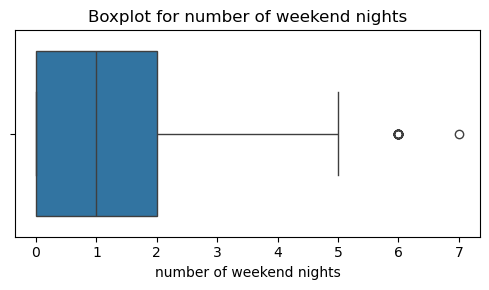

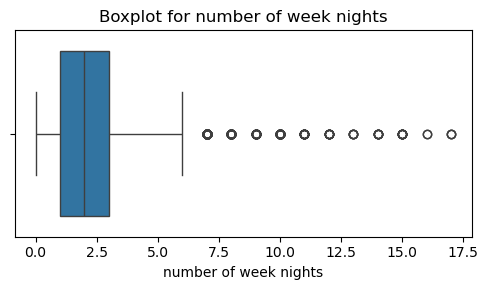

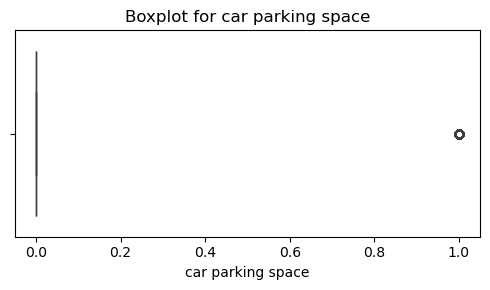

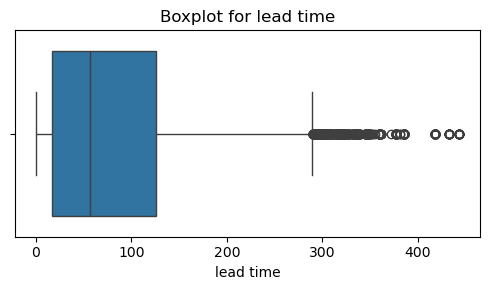

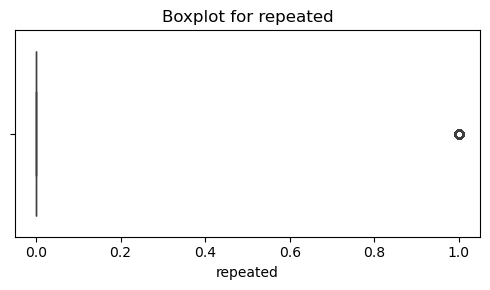

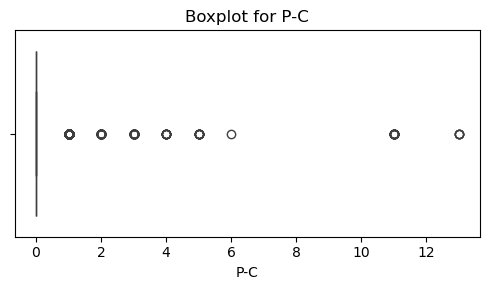

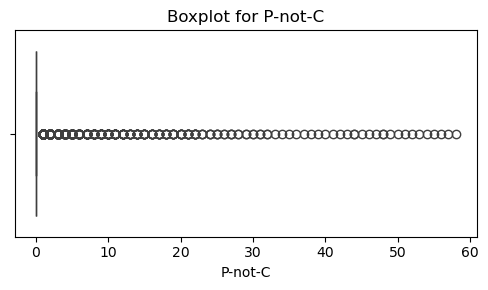

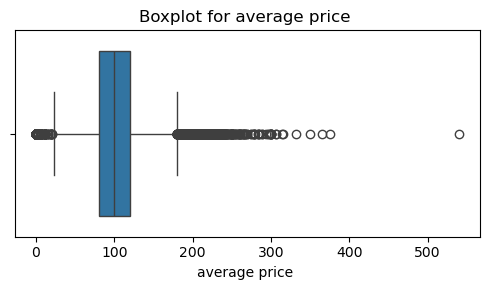

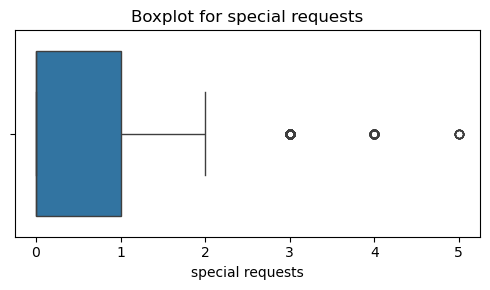

In [75]:
for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

In [103]:
outliers_df = pd.DataFrame()

In [105]:
for col in data.select_dtypes('number').columns:
    mean = data[col].mean()
    std_dev = data[col].std()
    outliers = data[np.abs(data[col] - mean) > (3*std_dev)] 
    outliers_df = pd.concat([outliers_df,outliers])
    data = data[np.abs(data[col] - mean) <= (3*std_dev)]

In [107]:
data.shape

(31445, 17)

In [109]:
outliers_df.shape

(4840, 17)

<b>OUTLIERS

<b>UniVarient Analysis

1. Histograms for Numerical Columns

In [220]:
data.select_dtypes('int').columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'special requests'],
      dtype='object')

<Axes: xlabel='number of adults', ylabel='Count'>

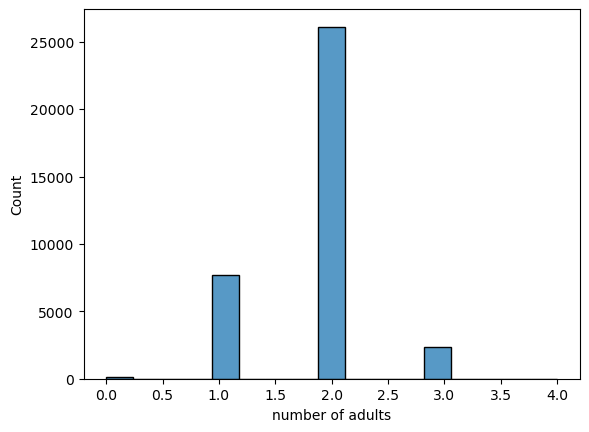

In [222]:
sns.histplot(data=data, x=data['number of adults'])

<Axes: xlabel='number of children', ylabel='Count'>

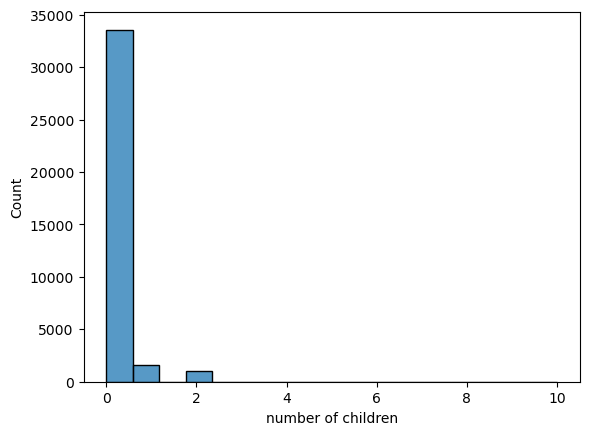

In [224]:
sns.histplot(data=data, x=data['number of children'])

<Axes: xlabel='number of weekend nights', ylabel='Count'>

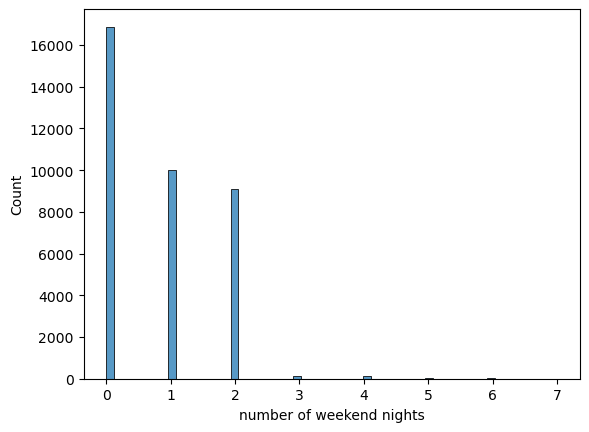

In [226]:
sns.histplot(data=data, x=data['number of weekend nights'])

<Axes: xlabel='number of week nights', ylabel='Count'>

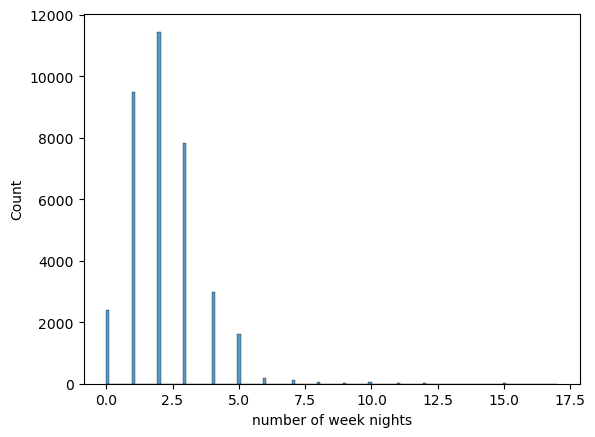

In [228]:
sns.histplot(data=data, x=data['number of week nights'])

<Axes: xlabel='car parking space', ylabel='Count'>

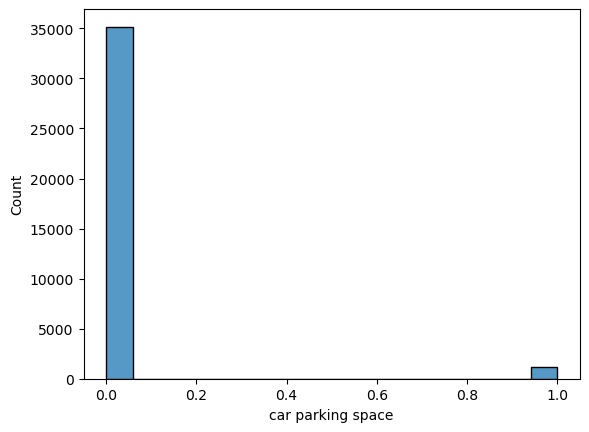

In [216]:
sns.histplot(data=data, x=data['car parking space'])

<Axes: xlabel='lead time', ylabel='Count'>

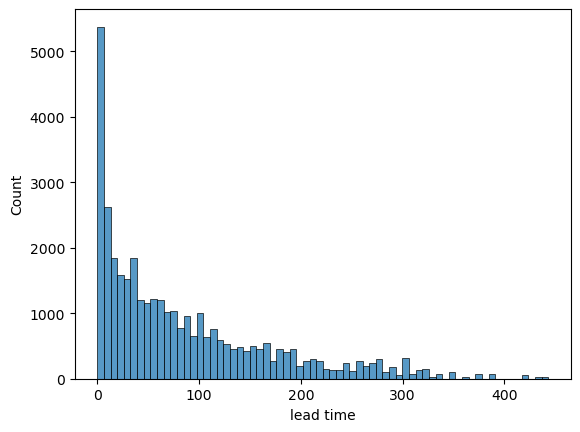

In [230]:
sns.histplot(data=data, x=data['lead time'])

<Axes: xlabel='repeated', ylabel='Count'>

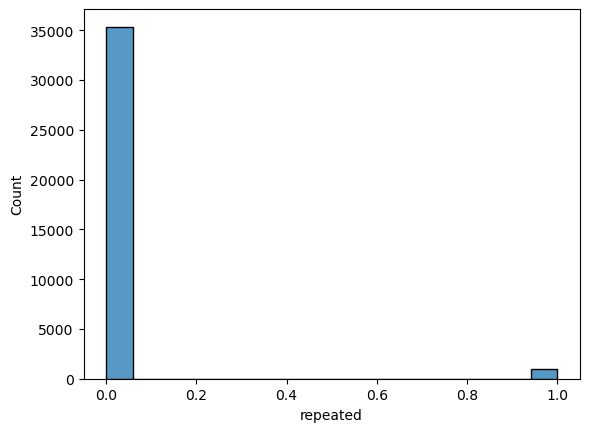

In [232]:
sns.histplot(data=data, x=data['repeated'])

<Axes: xlabel='P-C', ylabel='Count'>

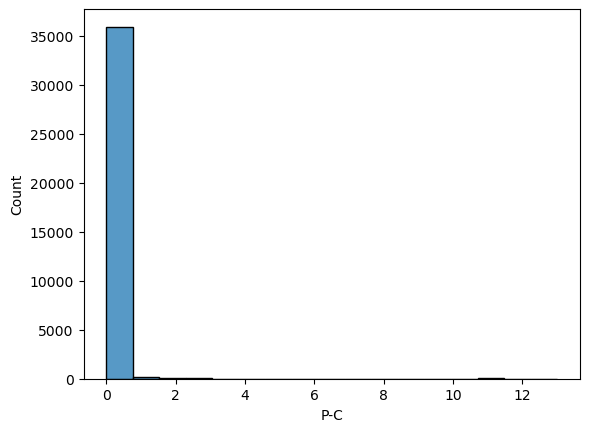

In [234]:
sns.histplot(data=data, x=data['P-C'])

<Axes: xlabel='P-not-C', ylabel='Count'>

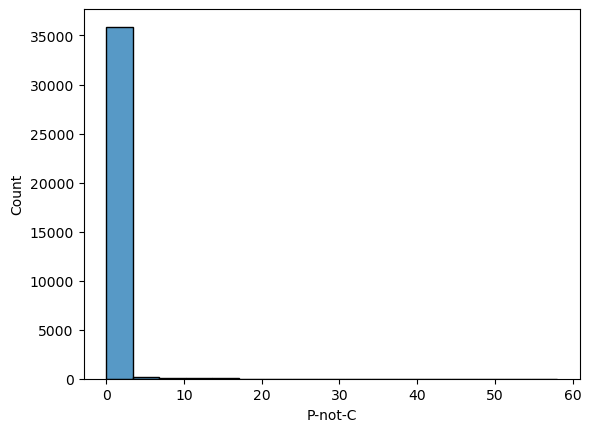

In [236]:
sns.histplot(data=data, x=data['P-not-C'])

<Axes: xlabel='special requests', ylabel='Count'>

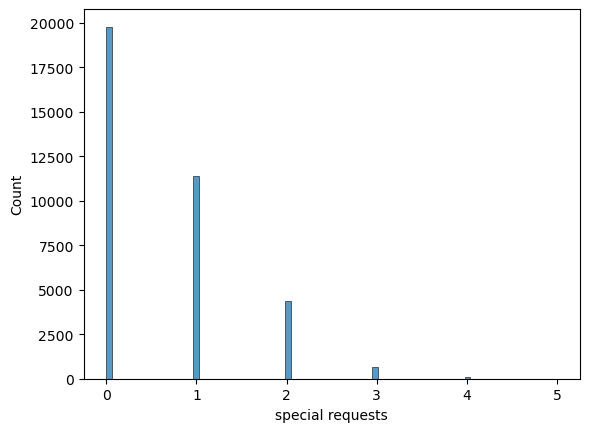

In [238]:
sns.histplot(data=data, x=data['special requests'])

2. Bar Plots for Categorical Data

In [241]:
data.select_dtypes('object').columns

Index(['Booking_ID', 'type of meal', 'room type', 'market segment type',
       'date of reservation', 'booking status'],
      dtype='object')

<Axes: xlabel='booking status', ylabel='number of weekend nights'>

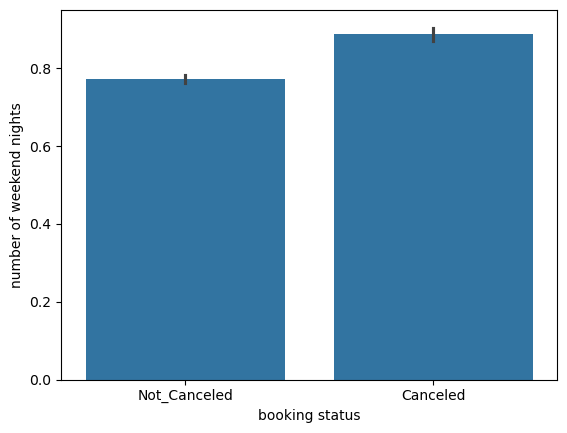

In [249]:
sns.barplot(data=data, x=data['booking status'], y=data['number of weekend nights'])

<Axes: xlabel='type of meal', ylabel='number of weekend nights'>

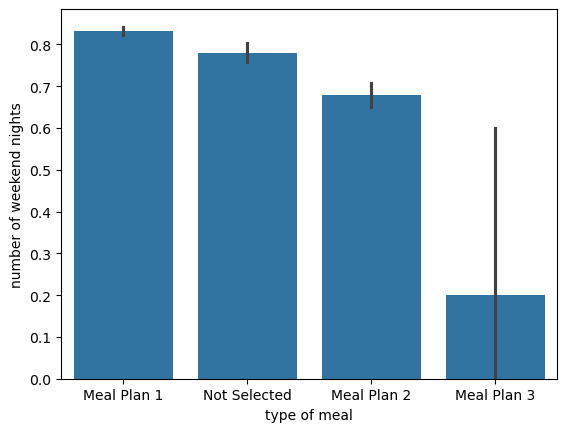

In [251]:
sns.barplot(data=data, x=data['type of meal'], y=data['number of weekend nights'])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

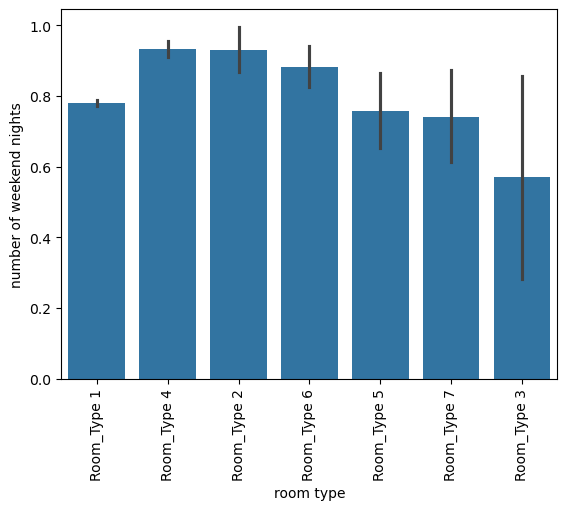

In [255]:
sns.barplot(data=data, x=data['room type'], y=data['number of weekend nights'])
plt.xticks(rotation=90)

<Axes: xlabel='market segment type', ylabel='number of weekend nights'>

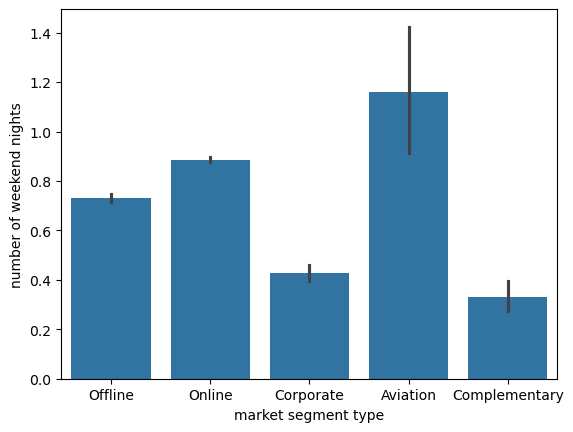

In [257]:
sns.barplot(data=data, x=data['market segment type'], y=data['number of weekend nights'])

<b>Bivarient Analysis

1. Cross Tabing

In [262]:
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [266]:
pd.crosstab(data['booking status'], data['market segment type'])

market segment type  Aviation  Complementary  Corporate  Offline  Online
booking status                                                          
Canceled                   37              0        220     3154    8478
Not_Canceled               88            391       1797     7377   14743

-> we detect complementary service is good and mostly not cancelled, corporate is good since it serves alot and least percentage of cancellation

In [275]:
pd.crosstab(data['type of meal'], data['market segment type'])

market segment type  Aviation  Complementary  Corporate  Offline  Online
type of meal                                                            
Meal Plan 1               125            370       1996     7990   17361
Meal Plan 2                 0             11          6     2366     923
Meal Plan 3                 0              4          0        1       0
Not Selected                0              6         15      174    4937

In [277]:
pd.crosstab(data['room type'], data['special requests'])

special requests      0     1     2    3   4  5
room type                                      
Room_Type 1       16310  8473  2890  423  36  6
Room_Type 2         300   288    79   19   6  0
Room_Type 3           6     1     0    0   0  0
Room_Type 4        2523  2204  1121  185  25  1
Room_Type 5         202    42    17    3   1  0
Room_Type 6         400   310   211   39   5  1
Room_Type 7          39    61    46    7   5  0

2. Grouping

In [419]:
data.groupby('market segment type', as_index=False)['average price '].mean()

market segment type  average price 
0            Aviation      100.704000
1       Complementary        3.141765
2           Corporate       82.911740
3             Offline       91.633628
4              Online      112.252311

In [302]:
data.groupby('market segment type', as_index=False)['lead time'].mean()

market segment type   lead time
0            Aviation    5.488000
1       Complementary   12.035806
2           Corporate   21.818047
3             Offline  122.903238
4              Online   75.329874

In [290]:
data.groupby('room type', as_index=False)['number of week nights'].mean()

room type  number of week nights
0  Room_Type 1               2.125418
1  Room_Type 2               2.316474
2  Room_Type 3               2.000000
3  Room_Type 4               2.541508
4  Room_Type 5               2.196226
5  Room_Type 6               2.330228
6  Room_Type 7               2.151899

In [294]:
data.groupby('market segment type', as_index = False)['number of weekend nights'].nunique()

market segment type  number of weekend nights
0            Aviation                         6
1       Complementary                         4
2           Corporate                         6
3             Offline                         6
4              Online                         8

<Axes: >

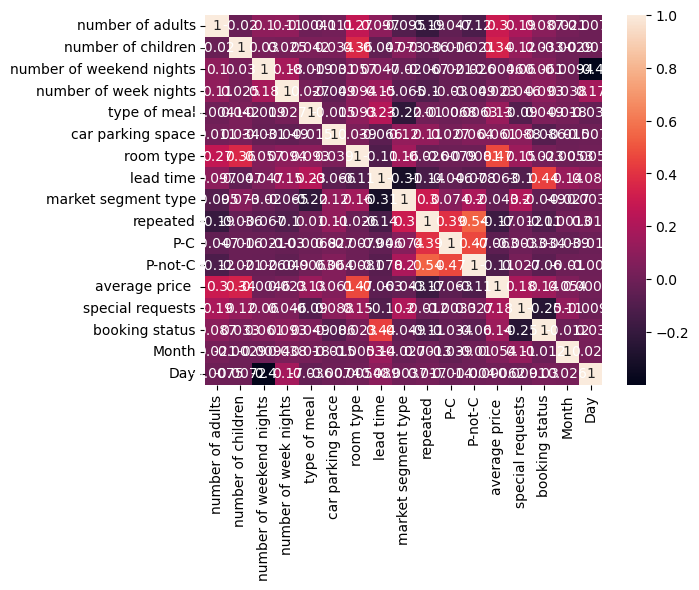

In [385]:
sns.heatmap(data.corr(), annot=True)

<h2>2. Feature Engineering</h2>

In [322]:
data.head(1)

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   

   number of week nights type of meal  car parking space    room type  \
0                      5  Meal Plan 1                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0            88.0   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled

- 1. drop Booking_ID
- 2. change type of meal to numbers
- 3. change room type to numbers
- 4. change booking status to numbers
- 5. change market segment type to numbers
- 6. decompose date to month and day of week and encode it
- 7. drop date column
- 8. Apply Correlation

In [325]:
data.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [327]:
data = data.drop(columns=['Booking_ID'])

In [329]:
data['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [331]:
TypeOfMeal_Replacements = {
    'Meal Plan 1': 1,
    'Not Selected': 0,
    'Meal Plan 2': 2,
    'Meal Plan 3':3
}

In [333]:
data['type of meal'] = data['type of meal'].replace(TypeOfMeal_Replacements)

C:\Users\Malak\AppData\Local\Temp\ipykernel_13616\2906477834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['type of meal'] = data['type of meal'].replace(TypeOfMeal_Replacements)


In [335]:
data['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [337]:
RoomType_Replacements = {
    'Room_Type 1':1,
    'Room_Type 4':4,
    'Room_Type 2':2,
    'Room_Type 5':5,
    'Room_Type 6':6,
    'Room_Type 7': 7,
    'Room_Type 3': 3
}

In [339]:
data['room type'] = data['room type'].replace(RoomType_Replacements)

C:\Users\Malak\AppData\Local\Temp\ipykernel_13616\3743651331.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['room type'] = data['room type'].replace(RoomType_Replacements)


In [341]:
data['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [343]:
data['booking status'] = data['booking status'].replace({'Canceled':1, 'Not_Canceled':0})

C:\Users\Malak\AppData\Local\Temp\ipykernel_13616\397718528.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['booking status'] = data['booking status'].replace({'Canceled':1, 'Not_Canceled':0})


In [345]:
data['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [347]:
MarketSegmentTypeReplacements = {
    'Online':1,
    'Offline':0,
    'Corporate':2,
    'Aviation':3,
    'Complementary':4
}

In [349]:
data['market segment type'] = data['market segment type'].replace(MarketSegmentTypeReplacements)

C:\Users\Malak\AppData\Local\Temp\ipykernel_13616\2985583121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['market segment type'] = data['market segment type'].replace(MarketSegmentTypeReplacements)


In [351]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

In [353]:
data['Month'] = data['date of reservation'].dt.month

In [355]:
data['Day'] = data['date of reservation'].dt.dayofweek

In [357]:
data['Day'].value_counts()

Day
6.0    6136
5.0    5420
0.0    5380
2.0    5123
1.0    4901
4.0    4743
3.0    4545
Name: count, dtype: int64

In [359]:
data.drop(columns=['date of reservation'], inplace=True)

In [361]:
data.head()

number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  type of meal  car parking space  room type  \
0                      5             1                  0          1   
1                      3             0                  0          1   
2                      3             1                  0          1   
3                      2             1                  0          1   
4                      2             0                  0          1   

   lead time  market segment type  repeated  P-C  P-not-C  average price   \
0        224                    0         0    0        0           88.00   
1          5                    1         0    0        0          106.68   
2          1                    1         0    0        0           50.00   
3        211                    1         0    0        0          100.00   
4         48                    1         0    0        0           77.00   

   special requests  booking status  Month  Day  
0                 0               0   10.0  4.0  
1                 1               0   11.0  1.0  
2                 0               1    2.0  2.0  
3                 1               1    5.0  5.0  
4                 0               1    4.0  2.0

In [363]:
data.corr()

number of adults  number of children  \
number of adults                  1.000000           -0.020027   
number of children               -0.020027            1.000000   
number of weekend nights          0.103316            0.029536   
number of week nights             0.105416            0.024680   
type of meal                     -0.004068            0.042233   
car parking space                 0.011467            0.034198   
room type                         0.270501            0.363802   
lead time                         0.097014           -0.047058   
market segment type              -0.095368            0.073016   
repeated                         -0.192175           -0.036371   
P-C                              -0.047395           -0.016398   
P-not-C                          -0.119106           -0.021201   
average price                     0.296832            0.337491   
special requests                  0.189317            0.124363   
booking status                    0.086774            0.033007   
Month                             0.020753           -0.002856   
Day                              -0.007470           -0.007205   

                          number of weekend nights  number of week nights  \
number of adults                          0.103316               0.105416   
number of children                        0.029536               0.024680   
number of weekend nights                  1.000000               0.179548   
number of week nights                     0.179548               1.000000   
type of meal                             -0.018840               0.026869   
car parking space                        -0.031102              -0.048814   
room type                                 0.057334               0.094142   
lead time                                 0.046510               0.149600   
market segment type                      -0.019791              -0.065353   
repeated                                 -0.067096              -0.099782   
P-C                                      -0.020687              -0.030089   
P-not-C                                  -0.026307              -0.049354   
average price                            -0.004565               0.022751   
special requests                          0.060432               0.046136   
booking status                            0.061489               0.092824   
Month                                    -0.009379               0.037701   
Day                                      -0.398483               0.169725   

                          type of meal  car parking space  room type  \
number of adults             -0.004068           0.011467   0.270501   
number of children            0.042233           0.034198   0.363802   
number of weekend nights     -0.018840          -0.031102   0.057334   
number of week nights         0.026869          -0.048814   0.094142   
type of meal                  1.000000          -0.015154   0.093411   
car parking space            -0.015154           1.000000   0.038778   
room type                     0.093411           0.038778   1.000000   
lead time                     0.226881          -0.066444  -0.107830   
market segment type          -0.223495           0.116728   0.162710   
repeated                      0.010003           0.110916  -0.025819   
P-C                          -0.006796           0.027109  -0.007934   
P-not-C                       0.006332           0.063814  -0.008136   
average price                 0.134699           0.061310   0.469908   
special requests             -0.090189           0.087889   0.145159   
booking status                0.049403          -0.086179   0.022877   
Month                         0.017672          -0.015034  -0.005318   
Day                          -0.036444          -0.007369   0.005405   

                          lead time  market segment type  repeated       P-C  \
number of adults           0.097014            -0.095368 -0.192175 -0.047

<Axes: >

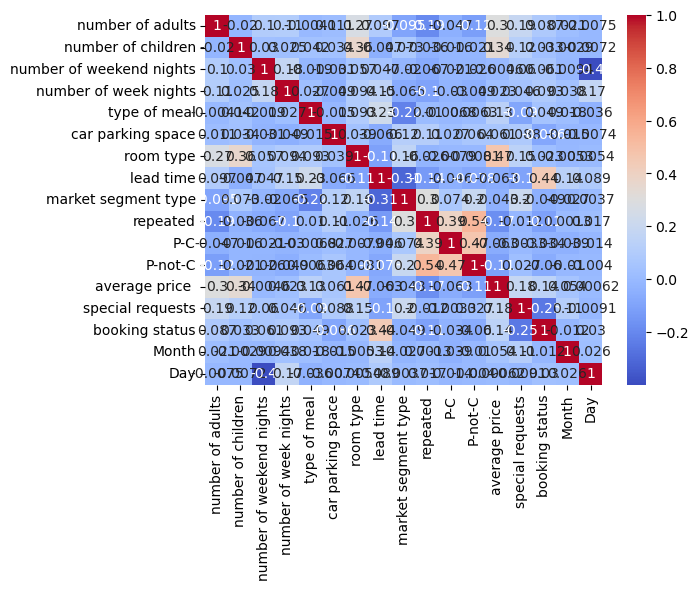

In [365]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [375]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'booking status',
       'Month', 'Day'],
      dtype='object')

In [381]:
subData = data.drop(columns=['car parking space', 'lead time','repeated', 'P-C', 'P-not-C',  'special requests','Day', 'Month','room type', 'type of meal','booking status'])

<Axes: >

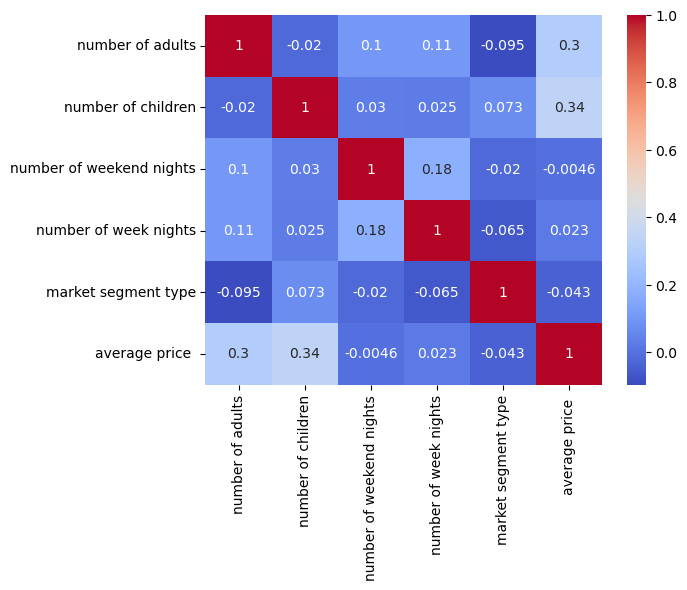

In [383]:
sns.heatmap(subData.corr(), annot=True, cmap='coolwarm')

In [134]:
data.isnull().sum()

number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
booking status               0
Month                       37
Day                         37
dtype: int64

In [136]:
data[data['Month'].isnull()]

number of adults  number of children  number of weekend nights  \
2626                  2                   0                         1   
3677                  1                   0                         1   
5600                  2                   0                         1   
6343                  1                   0                         1   
7648                  2                   1                         1   
8000                  2                   2                         1   
8989                  1                   0                         1   
9153                  2                   2                         1   
9245                  2                   0                         1   
9664                  1                   0                         1   
9934                  1                   0                         1   
10593                 2                   0                         1   
10652                 2                   0                         1   
10747                 2                   0                         1   
11881                 1                   0                         3   
13958                 1                   0                         1   
14304                 2                   0                         1   
15363                 1                   0                         1   
15438                 1                   0                         1   
17202                 2                   0                         1   
18380                 1                   0                         1   
18534                 1                   0                         1   
18680                 1                   0                         1   
19013                 1                   0                         1   
20419                 2                   0                         1   
21674                 1                   0                         1   
21688                 2                   0                         1   
26108                 2                   0                         1   
27559                 1                   0                         1   
27928                 2                   0                         1   
30552                 2                   1                         1   
30616                 1                   0                         1   
30632                 3                   0                         1   
30839                 1                   0                         1   
32041                 2                   0                         1   
34638                 1                   0                         1   
35481                 1                   0                         1   

       number of week nights  type of meal  car parking space  room type  \
2626                       5             1                  0          1   
3677                       3             1                  0          1   
5600                       3             1                  0          1   
6343                       1             1                  0          1   
7648                       5             1                  0          1   
8000                       3             1                  0          6   
8989                       2             1                  0          1   
9153                       3             1                  0          6   
9245                       3             1                  0          4   
9664                       0             1                  0          4   
9934                       2             1                  0          1   
10593                      3             1                  1          4   
10652                      2             1                  0          1   
10747                      3             1                  0          1   
11881                      7             1                  0          1   
13958           

In [146]:
data['Month'] = data['Month'].fillna(0)

In [148]:
data['Day'] = data['Day'].fillna(0)

In [150]:
data.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
Month                       0
Day                         0
dtype: int64

<h2>3. Model Selection/Fit/Train/Test with KNN</h2>

In [152]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [154]:
x = data.drop(columns='average price ', axis=1)
y = data['average price ']

In [156]:
x

number of adults  number of children  number of weekend nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36280                 2                   0                         0   
36281                 2                   0                         1   
36282                 2                   0                         1   
36283                 3                   0                         0   
36284                 2                   0                         0   

       number of week nights  type of meal  car parking space  room type  \
0                          5             1                  0          1   
1                          3             0                  0          1   
2                          3             1                  0          1   
3                          2             1                  0          1   
4                          2             0                  0          1   
...                      ...           ...                ...        ...   
36280                      2             2                  0          1   
36281                      3             1                  0          1   
36282                      3             1                  0          4   
36283                      4             1                  0          1   
36284                      5             1                  0          4   

       lead time  market segment type  repeated  P-C  P-not-C  \
0            224                    0         0    0        0   
1              5                    1         0    0        0   
2              1                    1         0    0        0   
3            211                    1         0    0        0   
4             48                    1         0    0        0   
...          ...                  ...       ...  ...      ...   
36280        346                    1         0    0        0   
36281         34                    1         0    0        0   
36282         83                    1         0    0        0   
36283        121                    0         0    0        0   
36284         44                    1         0    0        0   

       special requests  booking status  Month  Day  
0                     0               0   10.0  4.0  
1                     1               0   11.0  1.0  
2                     0               1    2.0  2.0  
3                     1               1    5.0  5.0  
4                     0               1    4.0  2.0  
...                 ...             ...    ...  ...  
36280                 1               1    9.0  3.0  
36281                 1               0   10.0  6.0  
36282                 1               0   12.0  2.0  
36283                 1               0    7.0  4.0  
36284                 3               0   10.0  3.0  

[36285 rows x 16 columns]

In [158]:
y

0         88.00
1        106.68
2         50.00
3        100.00
4         77.00
          ...  
36280    115.00
36281    107.55
36282    105.61
36283     96.90
36284    133.44
Name: average price , Length: 36285, dtype: float64

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [162]:
neighbors = np.arange(1,6) #6 not included
train_accuracies = {}
test_accuracies = {}

In [180]:
pip install --upgrade threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [184]:
for neighbor in neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(x_train,y_train)
    train_accuracies[neighbor] = knn.score(x_train,y_train)
    test_accuracies[neighbor] = knn.score(x_test,y_test)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

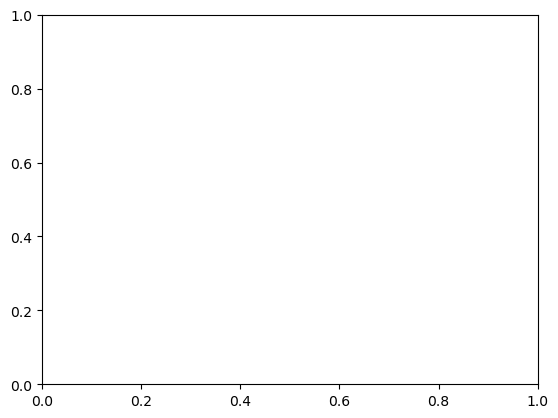

In [176]:
plt.plot(neighbors, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label='Testing Accuracy')
plt.xlabel('num of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Varying number of neighbors')
plt.figure(figsize=(8,6))
plt.show()